# Kevin Alvarez CSC 217 Fall 2019 First Project Update

## Addressing Feedback

Was told proposal looks interesting. I agree.

## Initial Findings

In [3]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset

Data was gathered from National Survey on Drug Use and Health, 2012 (ICPSR 34933)
Downloaded from https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv
Loaded in from a csv file. Features 17 different age groups. Younger ages seemed to be surveyed more and therefore broken up.
Column (drug)-use includes percentage of n that used said drug in the past 12 months.
Column (drug)-frequency includes median number of how times a user in the age group used said drug in the past 12 months.

In [4]:
data_set = pd.read_csv('data.csv')
data_set

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


### Max and Min Frequency
The following code finds the drug each age group uses the most and mininum.
My prediction is that younger age groups will use less numbing drugs compared to those of other ages. It is expected that older ages will be using more numbing drugs such as sedatives and painkillers.

In [5]:
age_max_freq = {}
age_min_freq = {}
for index, row in data_set.iterrows():
    age = row[0]
    max = 0.0
    min = 1000000.00
    max_drug = ''
    min_drug = ''
    for col in data_set.columns:
        if('freq' in col):
            freq = 0
            try:
                freq = float(row[col])
            except ValueError:
                continue
            if(freq > max):
                max = freq
                max_drug = col.split('-')[0]
            if(freq < min):
                min = freq
                min_drug = col.split('-')[0]
    age_max_freq[age] = [max,max_drug]
    age_min_freq[age] = [min,min_drug]
    print('Age Group of',age, 'MIN Frequency of',min,'for drug', min_drug, '\tMAX Frequency of',max,'for drug',max_drug)

Age Group of 12 MIN Frequency of 2.0 for drug stimulant 	MAX Frequency of 52.0 for drug hallucinogen
Age Group of 13 MIN Frequency of 1.0 for drug cocaine 	MAX Frequency of 41.0 for drug oxycontin
Age Group of 14 MIN Frequency of 2.0 for drug heroin 	MAX Frequency of 24.0 for drug marijuana
Age Group of 15 MIN Frequency of 1.0 for drug heroin 	MAX Frequency of 30.0 for drug sedative
Age Group of 16 MIN Frequency of 1.0 for drug crack 	MAX Frequency of 66.5 for drug heroin
Age Group of 17 MIN Frequency of 3.0 for drug hallucinogen 	MAX Frequency of 64.0 for drug heroin
Age Group of 18 MIN Frequency of 4.0 for drug hallucinogen 	MAX Frequency of 52.0 for drug marijuana
Age Group of 19 MIN Frequency of 2.0 for drug crack 	MAX Frequency of 180.0 for drug heroin
Age Group of 20 MIN Frequency of 2.0 for drug hallucinogen 	MAX Frequency of 60.0 for drug marijuana
Age Group of 21 MIN Frequency of 2.0 for drug inhalant 	MAX Frequency of 52.0 for drug alcohol
Age Group of 22-23 MIN Frequency of 

Looking over the results gathered in the above code it is clear opiates, specifically heroin, seems to be popular among all age groups. This ties in with the current opiod epidemic going on in the United States. Additionally, it is interesting to see that alchohol was max for the age group of 21 which ties in with United States drinking laws. In this hallucinogens seem to be frequently less used for a majority of age groups. This goes along with the idea that hallucinogens are harder to abuse. These results however aren't final, it'd be more appropriate to run more analyses to see how this data is distributed.

## Comparison of Marijuana and Alcohol

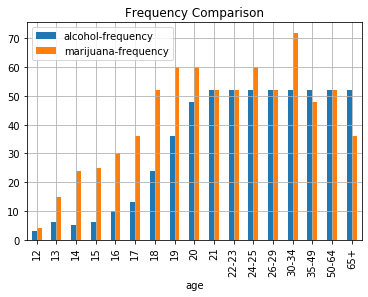

In [16]:
data_set.plot(x='age',y = ['alcohol-frequency','marijuana-frequency'],grid = True, kind='bar',title='Frequency Comparison')

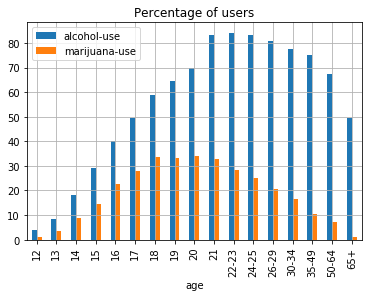

In [15]:
data_set.plot(x='age',y = ['alcohol-use', 'marijuana-use'],grid = True, kind='bar', title='Percentage of users')

From this graph we can see a higher percantage of each age group were more open to using alchohol compared to marijuana. This might be to the legality as the difference is bigger from legal age groups. However, in most age groups people seemed more open to using marijuana more frequently compared to alcohol. This is seen especially in younger age groups.

## Concerns

Only concern is I think breaking up the data by use and frequency columns would make it easier to visualize data in the future. Additionally data includes '-' for null values. This leads to issues of program interpreting this wrong. Will have to clean these values to include 0 instead. These should be fixed for final project.